In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Flatten
import cv2

from google.colab import drive
drive.mount('/content/drive')

# %matplotline inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
training_data, testing_data = keras.datasets.mnist.load_data()

print(f'Training Data Shape: {training_data[0].shape}')
#returns the length of dataset, dimensions of image matrix
print(f'Testing Data Shape: {testing_data[0].shape}')

Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


Image Label: 0


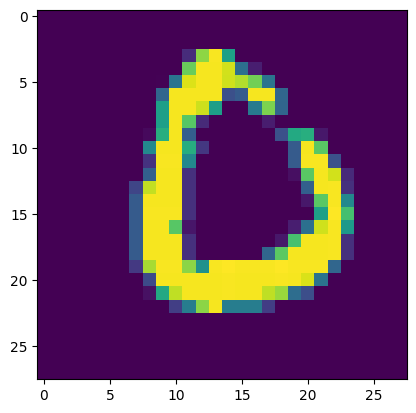

In [4]:
random_index = np.random.randint(low = 0, high = training_data[0].shape[0], size = 1, dtype =int)
random_example = np.squeeze(training_data[0][random_index], axis = 0)

plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
#training data is tuple (x,y)
plt.show()

In [5]:
train_x = training_data[0]/255.0
train_y = training_data[1] #extracts y from the tuple, labels are digits between 0 and 9

test_X = testing_data[0]/ 255.0 #scales pixels from 0-255 to between 0-1 helps train them a little faster, feature optimization
test_Y = testing_data[1]

In [6]:
print(f"Shape of x: {train_x.shape}")
print(f"Shape of y: {train_y.shape}") #size of our y is one column of 60,000 with integer labels
#convert integer values to categorical variables by assigning them to indentity/categorical matrix, multiple classes/bins (classification problem)

Shape of x: (60000, 28, 28)
Shape of y: (60000,)


In [7]:
train_y = keras.utils.to_categorical(train_y, num_classes = 10) #0-9 digits, trying to predict 10 classes
test_y = keras.utils.to_categorical(test_Y, num_classes = 10) #create categorical classes with test now

print(f"Shape of categorical train_y: {train_y.shape}")

#f(x)= w1x1 + w2x2+... wbxb + b
#but... feeding linear function in linear function will simply produce linear function which isnt reality
#use an activation function! ReLu--> rectified linear unit, (could also use softmax to convert inputs into probabilities)

Shape of categorical train_y: (60000, 10)


In [11]:
model = Sequential() #fully connected- each output goes to the next layer

model.add(Input(shape =(28,28))) #add an input layer, so that keras knows what to expect as input- like the shape
#nn can't really understand matrix in ANN (artificial nueral network)
#flatten matrix, stacking columns of matrix to form a single column vector
model.add(Flatten())#adds flatten layer
model.add(Dense(units=7, activation = 'relu')) #stacking nuerons on top of each other, this is called dense method, relu to introduce non-linear properties
model.add(Dense(units =30, activation = 'relu'))
model.add(Dense(units =83, activation = 'relu')) #hidden layers
model.add(Dense(units =47, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax')) #last layer has to have 10 units because we have 10 possible output labels, turn outputs into probabilites for each possible label


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 5495      
                                                                 
 dense_6 (Dense)             (None, 30)                240       
                                                                 
 dense_7 (Dense)             (None, 83)                2573      
                                                                 
 dense_8 (Dense)             (None, 47)                3948      
                                                                 
 dense_9 (Dense)             (None, 10)                480       
                                                                 
Total params: 12736 (49.75 KB)
Trainable params: 12736

In [13]:
#universal approximation theorem of nn can approximate any function f(x)
#loss function will tell us how bad our model is, minimize loss
#loss function should be differentiable bc we want to get the minimum, use derivatives to find how much each weight impacts the loss function
#back propogation uses chain rule to find every weight d/dx
#gradient descent finds alpha to figure out step size

loss_function = 'categorical_crossentropy' #sum of each x *log(probability of class), probability is low so its going to get a bigger penalty
optimizer = keras.optimizers.SGD(learning_rate = 0.01) #randomly runs gradient descent on certain datapoints, learning rate is alpha- find out bounds
metrics = ['accuracy']
model.compile(optimizer = optimizer, loss = loss_function, metrics = metrics)



In [14]:
history = model.fit(x = train_x, y = train_y, batch_size = 32, epochs =50, shuffle = True) #epochs are the number of times we want our inputs to run through the model, shuffle- shuffles the data before each epoch
#divides data into 32 batches

Epoch 1/50
1875/1875 [==============================] - 14s 4ms/step - loss: 1.1457 - accuracy: 0.6128
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4562 - accuracy: 0.8652
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3594 - accuracy: 0.8949
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3179 - accuracy: 0.9063
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2913 - accuracy: 0.9133
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2708 - accuracy: 0.9191
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9238
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2448 - accuracy: 0.9262
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2359 - accuracy: 0.9295
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.22

In [16]:
model.evaluate(x= test_X, y = test_y, batch_size = 32) #overfitting, model memorizes the data instead of 'learning', add penalties to our weights- add constraints to model even more

313/313 [==============================] - 1s 4ms/step - loss: 0.2009 - accuracy: 0.9401


[0.20090027153491974, 0.9401000142097473]

Image Label: 7


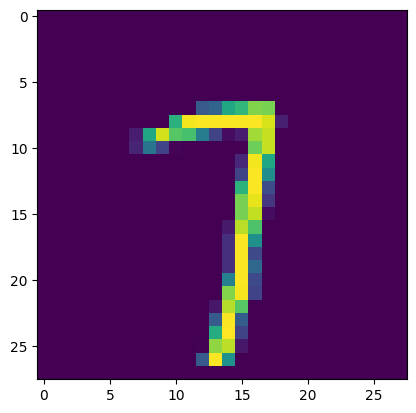

In [17]:
random_index = np.random.randint(low = 0, high = training_data[0].shape[0], size = 1, dtype = int)
random_example = np.squeeze(training_data[0][random_index], axis = 0) #axis= first dimension of the tuple, squeeze removes unnecesary dimension
plt.imshow(random_example)

print(f'Image Label: {training_data[1][random_index][0]}')
plt.show()

In [19]:
prediction = model.predict(random_example.reshape(1,28,28))
print(f'actual: {training_data[1][random_index][0]}')
print(f'Model prediction: {np.argmax(prediction)}') #returns the highest probability output

1/1 [==============================] - 0s 335ms/step
actual: 7
Model prediction: 7
